# Intro

Este notebook contiene un ejemplo básico del uso de <code> mesa </code> para el modelado basado en agentes. Este ejemplo es desarrollado en el [turorial](https://mesa.readthedocs.io/en/master/tutorials/intro_tutorial.html#tutorial-description) básico en la página oficial de la documentacon de <code> mesa </code>.

La base de este ejemplo, es un modelo básico de agentes intercambiando dinero como un enfoque básico al modelado de la distribución del ingreso ([Dragulescu 2002](http://arxiv.org/abs/cond-mat/0211175)). Las reglas básicas del modelo son las siguentes:

   * N agentes
   * Todos los agentes empeiazan con una unidad de dinero
   * En cada paso (temporal), un agente da esa unidad de dinero (si lo tiene) a otro agente
   

Para iniciar con un modelo en mesa se crean dos clases basadas en las clases de mesa: Agent y Model


In [17]:
from mesa import Agent, Model

class MoneyAgent(Agent):
    """An agent with fixed initial wealth."""
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1

class MoneyModel(Model):
    """A model with some number of agents."""
    def __init__(self, N):
        self.num_agents = N
        # Create agents
        #self.list_of_agents=[] #yo puse esta lista para añadir los agentes creados por el modelo
                            #pero debe haber un atributo en la parent class M que los guarde?
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)
            #self.list_of_agents.append(a)

In [18]:
basico=MoneyModel(9)
#basico.list_of_agents[8].wealth
dir(basico)
basico.step() #no hay nada definido en el parent ni en el child classes

# Primer modelo básico

Añadiendo las funciones de pasos y <code> scheduler </code>

In [19]:
from mesa import Agent, Model
from mesa.time import RandomActivation

class MoneyAgent(Agent):
    """An agent with fixed initial wealth.""" #Atributos iniciales del agente
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1
        
    def step(self): #Acción que realiza el agente cuando es 'activado'
        print(f'Hola, soy el {self.unique_id}-ésimo agente')
        self.wealth +=1 #aumenta su riqueza en una unidad
        print(f'Mi nueva riqueza es {self.wealth}') #imprime su nueva riqueza
        

class MoneyModel(Model):
    """A model with some number of agents."""
    def __init__(self, N): #atributos del modelo
        self.num_agents = N
        self.schedule = RandomActivation(self)
        # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)
            self.schedule.add(a)
            
    def step(self):
        '''Avanza el modelo un paso'''
        self.schedule.step()

In [20]:
modelo_1=MoneyModel(10)

In [21]:
type(modelo_1.schedule.agents) #esta es la lista de los agentes creados al crear el modelo 

list

In [22]:
modelo_1.step()

Hola, soy el 7-ésimo agente
Mi nueva riqueza es 2
Hola, soy el 1-ésimo agente
Mi nueva riqueza es 2
Hola, soy el 9-ésimo agente
Mi nueva riqueza es 2
Hola, soy el 8-ésimo agente
Mi nueva riqueza es 2
Hola, soy el 5-ésimo agente
Mi nueva riqueza es 2
Hola, soy el 2-ésimo agente
Mi nueva riqueza es 2
Hola, soy el 0-ésimo agente
Mi nueva riqueza es 2
Hola, soy el 6-ésimo agente
Mi nueva riqueza es 2
Hola, soy el 3-ésimo agente
Mi nueva riqueza es 2
Hola, soy el 4-ésimo agente
Mi nueva riqueza es 2


Ahora se modifica el paso del agente para que le de su riqueza a un agente de manera random con las paqueterías random que incluye mesa

In [23]:
from mesa import Agent, Model
from mesa.time import RandomActivation
import random as rm

class MoneyAgent(Agent):
    """An agent with fixed initial wealth.""" #Atributos iniciales del agente
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1
        
    def step(self):
        if self.wealth == 0:
            #print(f'El {self.unique_id}-ésimo agente no tiene riqueza')
            return
        other_agent=rm.choice(self.model.schedule.agents) #using  simple random choice from python
        #other_agent = self.random.choice(self.model.schedule.agents) #metodos para seleccion 
                                                                  #aleatoria de mesa
                    #lo que esta en el ultimo parentesis es la lista de agentes que se creo para 
                    # en scheduler
        other_agent.wealth += 1
        self.wealth -= 1
        #print(f'soy el agente {self.unique_id} y tengoo {self.wealth} riqueza')
    
        
class MoneyModel(Model):
    """A model with some number of agents."""
    def __init__(self, N): #atributos del modelo
        self.num_agents = N
        self.schedule = RandomActivation(self)
        # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)
            self.schedule.add(a)
            
    def step(self):
        '''Avanza el modelo un paso'''
        self.schedule.step()

In [24]:
model = MoneyModel(100)
for i in range(10):
    model.step()
    #print('End of step')
for item in model.schedule.agents: #esto imprime la riqueza de los agentes pero no estan en 
                                    #orden porque es la lista del random scheduler
    #print(f'La riqueza del {item.unique_id} agente es {item.wealth}') #al parecer la lista si 
    pass                                                    #es ordenada


**Obteniendo datos del modelo**

"Next, we need to get some data out of the model. Specifically, we want to see the distribution of the agent’s wealth. We can get the wealth values with list comprehension, and then use matplotlib (or another graphics library) to visualize the data in a histogram."

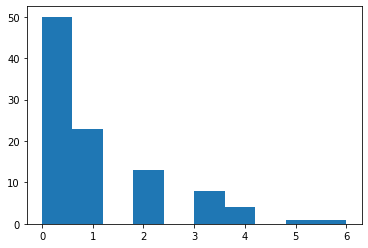

In [25]:
# The below is needed for both notebooks and scripts
import matplotlib.pyplot as plt

# For jupyter notebook add the following line:
%matplotlib inline

agent_wealth = [a.wealth for a in model.schedule.agents] #list comprehension :)
plt.hist(agent_wealth)
#For a script add the following line
plt.show()

"To get a better idea of how a model behaves, we can create multiple model runs and see the distribution that emerges from all of them. We can do this with a nested for loop:"

In [26]:
all_wealth = []
#This runs the model 100 times, each model executing 10 steps.
for j in range(100):
    # Run the model
    model = MoneyModel(5)
    for i in range(10):
        model.step()

    # Store the results
    for agent in model.schedule.agents:
        all_wealth.append(agent.wealth)

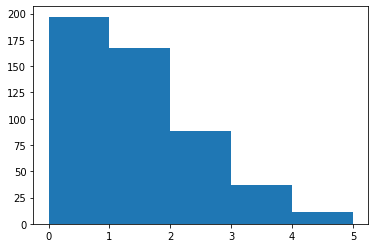

In [27]:
plt.hist(all_wealth, bins=range(max(all_wealth)+1))
plt.show()

This runs 100 instantiations of the model, and runs each for 10 steps. (Notice that we set the histogram bins to be integers, since agents can only have whole numbers of wealth). This distribution looks a lot smoother. By running the model 100 times, we smooth out some of the ‘noise’ of randomness, and get to the model’s overall expected behavior.

This outcome might be surprising. Despite the fact that all agents, on average, give and receive one unit of money every step, the model converges to a state where most agents have a small amount of money and a small number have a lot of money.

# Añadiendo espacio al modelo

##  
Mesa has two main types of grids: SingleGrid and MultiGrid. SingleGrid enforces at most one agent per cell; MultiGrid allows multiple agents to be in the same cell. Since we want agents to be able to share a cell, we use MultiGrid.

In [28]:
from mesa import Agent, Model
from mesa.space import MultiGrid


We instantiate a grid with width and height parameters, and a boolean as to whether the grid is toroidal. Let’s make width and height model parameters, in addition to the number of agents, and have the grid always be toroidal. We can place agents on a grid with the grid’s place_agent method, which takes an agent and an (x, y) tuple of the coordinates to place the agent.

In [29]:
class MoneyModel(Model):
    """A model with some number of agents."""
    def __init__(self, N, width, height): # el objeto a crear del modelo requiere ahora mas parametros
        self.num_agents = N
        self.grid = MultiGrid(width, height, True) #aqui se añade el espacio
        self.schedule = RandomActivation(self)

        # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)
            self.schedule.add(a)

            # Add the agent to a random grid cell
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))

Under the hood, each agent’s position is stored in two ways: the agent is contained in the grid in the cell it is currently in, and the agent has a <code>pos</code> variable with an (x, y) coordinate tuple. The <code>place_agent </code>  method adds the coordinate to the agent automatically.

In [30]:
#modelo con 10 agentes en una rejilla de 5x5
model=MoneyModel(10,5,5)

In [31]:
#imprimimos las pocisiones de los agentes
for a in model.schedule.agents:
    print(a.pos)

(4, 4)
(3, 2)
(2, 1)
(0, 3)
(2, 3)
(2, 0)
(4, 1)
(1, 2)
(3, 4)
(0, 1)


Now we need to add to the agents’ behaviors, letting them move around and only give money to other agents in the same cell.

First let’s handle movement, and have the agents move to a neighboring cell. The grid object provides a ```move_agent``` method, which like you’d imagine, moves an agent to a given cell. That still leaves us to get the possible neighboring cells to move to. There are a couple ways to do this. One is to use the current coordinates, and loop over all coordinates +/- 1 away from it. For example:

```neighbors = []
x, y = self.pos
for dx in [-1, 0, 1]:
    for dy in [-1, 0, 1]:
        neighbors.append((x+dx, y+dy))```

But there’s an even simpler way, using the grid’s built-in ```get_neighborhood``` method, which returns all the neighbors of a given cell. This method can get two types of cell neighborhoods: **Moore** (includes all 8 surrounding squares), and **Von Neumann**(only up/down/left/right). It also needs an argument as to whether to include the center cell itself as one of the neighbors.

With that in mind, the agent’s move method looks like this:

In [ ]:

class MoneyAgent(Agent):
    #...
    def move(self):
    #possible steps nos da la vecindad de moore
        possible_steps = self.model.grid.get_neighborhood(
            self.pos,
            moore=True,
            include_center=False)
        new_position = self.random.choice(possible_steps)
        #el metodo move_agent cambia las pocisiones de los agentes de acuerdo a lo escrito 
        #en new position
        self.model.grid.move_agent(self, new_position) 


Next, we need to get all the **other agents** present in a cell, and give one of them some money. We can get the contents of one or more cells using the grid’s ```get_cell_list_contents``` method, or by accessing a cell directly. The method accepts a list of cell coordinate tuples, or a single tuple if we only care about one cell.

In [ ]:
#This should be inside the Agent class  
    def give_money(self):
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        if len(cellmates) > 1:
            other = self.random.choice(cellmates)
            other.wealth += 1
            self.wealth -= 1
        

And with those two methods, the agent’s step method becomes:

In [ ]:
class MoneyAgent(Agent):
    # ...
    def step(self):
        self.move()
        if self.wealth > 0:
            self.give_money()

Putting all together:

In [48]:
class MoneyAgent(Agent):
    """ An agent with fixed initial wealth."""
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1

    def move(self):
        possible_steps = self.model.grid.get_neighborhood(
            self.pos,
            moore=True,
            include_center=False)
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)

    def give_money(self):
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        if len(cellmates) > 1:
            other_agent = self.random.choice(cellmates)
            other_agent.wealth += 1
            self.wealth -= 1

    def step(self):
        self.move()
        if self.wealth > 0:
            self.give_money()


class MoneyModel(Model):
    """A model with some number of agents."""
    def __init__(self, N, width, height):
        self.num_agents = N
        self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)
        # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)
            self.schedule.add(a)
            # Add the agent to a random grid cell
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))

    def step(self):
        self.schedule.step()

Example with 50 agents and a 10x10 grid, with 20 ticks 

In [88]:
model=MoneyModel(50,10,10)
for i in range(1000):
    model.step()

Now let’s use matplotlib and numpy to visualize the number of agents residing in each cell. To do that, we create a numpy array of the same size as the grid, filled with zeros. Then we use the grid object’s ```coord_iter()``` feature, which lets us loop over every cell in the grid, giving us each cell’s coordinates and contents in turn.

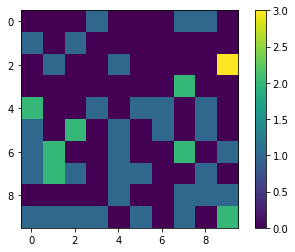

In [57]:
import numpy as np

agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell in model.grid.coord_iter():
    cell_content, x, y = cell
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count
plt.imshow(agent_counts, interpolation='nearest')
plt.colorbar()
plt.show()
# If running from a text editor or IDE, remember you'll need the following:
#plt.show()

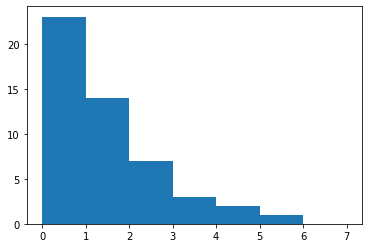

2

In [119]:
agent_wealths = [agent.wealth for agent in model.schedule.agents]
type(agent_wealths)
aw=np.array(agent_wealths) #using numpy for analysis
plt.hist(aw, bins=range(max(aw)+3))
plt.show()
np.count_nonzero(aw==4) #counting occurrencies in an array

## Collecting Data
So far, at the end of every model run, we’ve had to go and write our own code to get the data out of the model. This has two problems: it isn’t very efficient, and it only gives us end results. If we wanted to know the wealth of each agent at each step, we’d have to add that to the loop of executing steps, and figure out some way to store the data.

Since one of the main goals of agent-based modeling is generating data for analysis, Mesa provides a class which can handle data collection and storage for us and make it easier to analyze.

The **data collector** stores three categories of data:   
   * model-level variables  
   * agent-level variables  
   * tables (which are a catch-all for everything else)    

Model- and agent-level variables are added to the data collector along with a function for collecting them. Model-level collection functions take a model object as an input, while agent-level collection functions take an agent object as an input. Both then return a value computed from the model or each agent at their current state. When the data collector’s ```collect``` method is called, with a model object as its argument, it applies each model-level collection function to the model, and stores the results in a dictionary, associating the current value with the current step of the model. Similarly, the method applies each agent-level collection function to each agent currently in the schedule, associating the resulting value with the step of the model, and the agent’s ```unique_id```.

Let’s add a DataCollector to the model, and collect two variables. At the agent level, we want to collect every agent’s wealth at every step. At the model level, let’s measure the model’s Gini Coefficient, a measure of wealth inequality.

In [120]:
from mesa.datacollection import DataCollector

def compute_gini(model):
    agent_wealths = [agent.wealth for agent in model.schedule.agents]
    x = sorted(agent_wealths)
    N = model.num_agents
    B = sum( xi * (N-i) for i,xi in enumerate(x) ) / (N*sum(x))
    return (1 + (1/N) - 2*B)

In [121]:
class MoneyAgent(Agent):
    """ An agent with fixed initial wealth."""
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1

    def move(self):
        possible_steps = self.model.grid.get_neighborhood(
            self.pos,
            moore=True,
            include_center=False)
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)

    def give_money(self):
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        if len(cellmates) > 1:
            other_agent = self.random.choice(cellmates)
            other_agent.wealth += 1
            self.wealth -= 1

    def step(self):
        self.move()
        if self.wealth > 0:
            self.give_money()


class MoneyModel(Model):
    """A model with some number of agents."""
    def __init__(self, N, width, height):
        self.num_agents = N
        self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)
        # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)
            self.schedule.add(a)
            # Add the agent to a random grid cell
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))
            
        self.datacollector = DataCollector(
            model_reporters={"Gini": compute_gini}, #función que se aplica a los agenes en cada paso
            agent_reporters={"Wealth": "wealth"})

    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()
    
    

At every step of the model, the datacollector will collect and store the model-level current Gini coefficient, as well as each agent’s wealth, associating each with the current step.

We run the model just as we did above. Now is when an interactive session, especially via a Notebook, comes in handy: the DataCollector can export the data it’s collected as a pandas DataFrame, for easy interactive analysis.

In [127]:
model = MoneyModel(50, 10, 10)
for i in range(100):
    model.step()

To get the series of Gini coefficients as a pandas DataFrame:



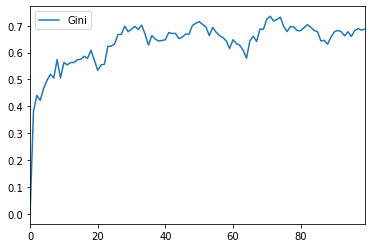

In [129]:
gini = model.datacollector.get_model_vars_dataframe()
gini.plot()
plt.show()

Similarly, we can get the agent wealth data

In [132]:
agent_wealth = model.datacollector.get_agent_vars_dataframe()
agent_wealth

Wealth
Step AgentID        
0    0             1
     1             1
     2             1
     3             1
     4             1
...              ...
99   45            2
     46            0
     47            0
     48            0
     49            1

[5000 rows x 1 columns]

You’ll see that the DataFrame’s index is pairings of model step and agent ID. You can analyze it the way you would any other DataFrame. For example, to get a histogram of agent wealth at the model’s end: 

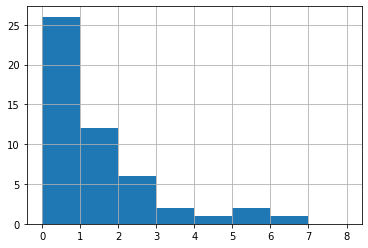

In [134]:
end_wealth = agent_wealth.xs(99, level="Step")["Wealth"]
end_wealth.hist(bins=range(agent_wealth.Wealth.max()+1)) #analisis de los datos con metodos de 
#data frames de Pandas
plt.show()

Or to plot the wealth of a given agent (in this example, agent 14):



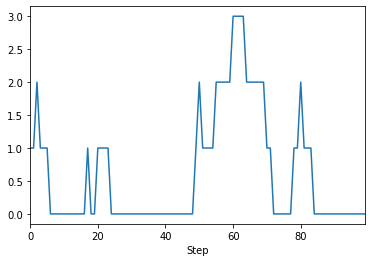

In [136]:
one_agent_wealth = agent_wealth.xs(14, level="AgentID")
one_agent_wealth.Wealth.plot()
plt.show()

## Batch run

Like we mentioned above, you usually won’t run a model only once, but multiple times, with fixed parameters to find the overall distributions the model generates, and with varying parameters to analyze how they drive the model’s outputs and behaviors. Instead of needing to write nested for-loops for each model, Mesa provides a BatchRunner class which automates it for you.

The BatchRunner also requires an additional variable ```self.running``` for the MoneyModel class. This variable enables conditional shut off of the model once a condition is met. In this example it will be set as True indefinitely.

In [138]:
class MoneyAgent(Agent):
    """ An agent with fixed initial wealth."""
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1

    def move(self):
        possible_steps = self.model.grid.get_neighborhood(
            self.pos,
            moore=True,
            include_center=False)
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)

    def give_money(self):
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        if len(cellmates) > 1:
            other_agent = self.random.choice(cellmates)
            other_agent.wealth += 1
            self.wealth -= 1

    def step(self):
        self.move()
        if self.wealth > 0:
            self.give_money()


class MoneyModel(Model):
    """A model with some number of agents."""
    def __init__(self, N, width, height):
        self.num_agents = N
        self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)
        self.running = True
        # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)
            self.schedule.add(a)
            # Add the agent to a random grid cell
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))
            
        self.datacollector = DataCollector(
            model_reporters={"Gini": compute_gini}, #función que se aplica a los agenes en cada paso
            agent_reporters={"Wealth": "wealth"})

    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()
    
    

We instantiate a BatchRunner with a model class to run, and two dictionaries: one of the fixed parameters (mapping model arguments to values) and one of varying parameters (mapping each parameter name to a sequence of values for it to take). The BatchRunner also takes an argument for how many model instantiations to create and run at each combination of parameter values, and how many steps to run each instantiation for. Finally, like the DataCollector, it takes dictionaries of model- and agent-level reporters to collect. Unlike the DataCollector, it won’t collect the data every step of the model, but only at the end of each run.

In the following example, we hold the height and width fixed, and vary the number of agents. We tell the BatchRunner to run 5 instantiations of the model with each number of agents, and to run each for 100 steps.*

We have it collect the final Gini coefficient value.

Now, we can set up and run the BatchRunner:

The total number of runs is 245. That is 10 agents to 490 increasing by 10, making 49 agents populations. Each agent population is then run 5 times (49 5) for 245 iterations

In [139]:
from mesa.batchrunner import BatchRunner

In [140]:
fixed_params = {"width": 10,
               "height": 10}
variable_params = {"N": range(10, 500, 10)}

batch_run = BatchRunner(MoneyModel,
                        variable_params,
                        fixed_params,
                        iterations=5,
                        max_steps=100,
                        model_reporters={"Gini": compute_gini})
batch_run.run_all()

#si se tarda bastante en correr 500 veces el modelo con variación de parametros, el parametro
#que se varia es el numero de agentes

245it [04:42,  1.15s/it]


Like the DataCollector, we can extract the data we collected as a DataFrame.

In [142]:
run_data = batch_run.get_model_vars_dataframe()
run_data

,N,Run,Gini,width,height
0,10,0,0.680000,10,10
1,10,1,0.580000,10,10
2,10,2,0.580000,10,10
3,10,3,0.640000,10,10
4,10,4,0.580000,10,10
...,...,...,...,...,...
240,490,240,0.661183,10,10
241,490,241,0.601416,10,10
242,490,242,0.637743,10,10
243,490,243,0.637759,10,10


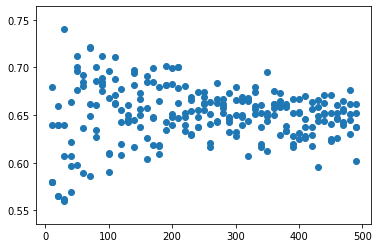

In [145]:
plt.scatter(run_data.N, run_data.Gini)
plt.show()

Notice that each row is a model run, and gives us the parameter values associated with that run. We can use this data to view a scatter-plot comparing the number of agents to the final Gini.

# Referencias 

[Dragulescu2002] Drăgulescu, Adrian A., and Victor M. Yakovenko. “Statistical Mechanics of Money, Income, and Wealth: A Short Survey.” arXiv Preprint Cond-mat/0211175, 2002.
[link](http://arxiv.org/abs/cond-mat/0211175)

[Tutorial](https://mesa.readthedocs.io/en/master/tutorials/intro_tutorial.html#tutorial-description) in mesa.readthedocs.io 